In [1]:
from fastai.vision.all import *
import pandas as pd

import matplotlib

import numpy as np


In [2]:
df = pd.read_csv('all_data_info.csv')

df.head()


,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [3]:

val = (df['style'].value_counts() > 1000)

res = val.loc[val == True]


ancient_len = len(df.index)
df =df[df['style'].isin(res.index)]


df = df[df['in_train'] == True]


new_len = len(df.index)
cat = df['style'].value_counts()

print(cat)

print("going from " + str( ancient_len) + " to " + str(new_len) + " images \nWe only keep certain style and images contained in the train folder")

style
Impressionism                   8220
Realism                         8112
Romanticism                     7041
Expressionism                   5325
Post-Impressionism              4527
Art Nouveau (Modern)            3779
Baroque                         3254
Surrealism                      3133
Symbolism                       2626
Rococo                          2101
Northern Renaissance            1824
Naïve Art (Primitivism)         1776
Neoclassicism                   1622
Abstract Expressionism          1546
Cubism                          1316
Ukiyo-e                         1137
Early Renaissance               1052
High Renaissance                1050
Mannerism (Late Renaissance)    1025
Art Informel                     987
Magic Realism                    696
Name: count, dtype: int64
going from 103250 to 62149 images 
We only keep certain style and images contained in the train folder


On garde 21 categories de plus de 1000 photos

In [4]:
df.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
10,Hiroshige,1844,bird-and-flower painting,5492.0,8283.0,10736273.0,wikiart,Ukiyo-e,Camellia and Bush Warbler,train_and_test,True,53180.jpg
11,Wolfgang Paalen,1937.0,landscape,5331.0,8351.0,1407667.0,wikiart,Surrealism,Forbidden Land,train_only,True,70944.jpg
12,Mabuse,NaN,religious painting,5259.0,8400.0,1489790.0,wikiart,Northern Renaissance,Descent from the cross,train_only,True,59792.jpg
13,Utagawa Kunisada,NaN,landscape,9293.0,4688.0,10274760.0,wikiart,Ukiyo-e,Snowy landscape with a woman brandishing a broom and a man holding an umbrella,train_only,True,48138.jpg
14,Ivan Aivazovsky,1873,marina,7444.0,5811.0,3189597.0,wikiart,Romanticism,Storm at sea,train_and_test,True,99442.jpg


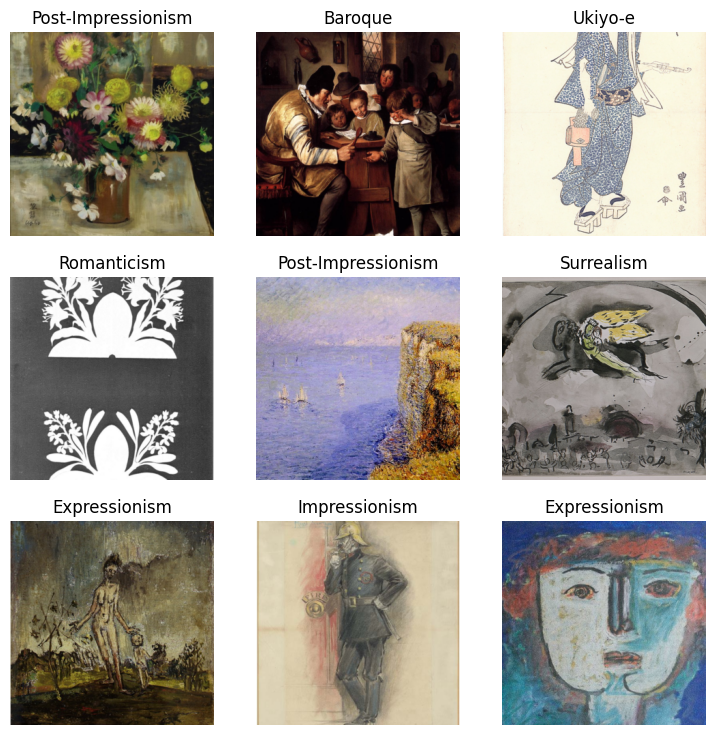

In [7]:


batch_tfms = [IntToFloatTensor(div = 255.0), Normalize.from_stats(*imagenet_stats)]

data = ImageDataLoaders.from_df(
  df=df, 
  path= 'data/train/',
  label_col='style', 
  fn_col='new_filename', 
  ds_tfms= batch_tfms,
  item_tfms= Resize(299) ,
  bs=48, 
  shuffle= True)


data.show_batch()

In [10]:
# Checking if no files are corrupted + correcting error with PIL
import os
from os import listdir
import PIL
from PIL import Image

PIL.Image.MAX_IMAGE_PIXELS = 933120000
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


for ind in df.index:
    filename = "data/train/" + df["new_filename"][ind]
    try:
        im = Image.open(filename)
        im.verify() #I perform also verify, don't know if he sees other types o defects
    except(IOError,SyntaxError)as e:
         print('Bad file  :  '+filename)
         count=count+1
         print(count)

In [11]:
learner = vision_learner(dls=data,
                          arch=models.resnet50, 
                          metrics=[error_rate])

In [12]:
learner.fine_tune(epochs=1)

epoch,train_loss,valid_loss,error_rate,time


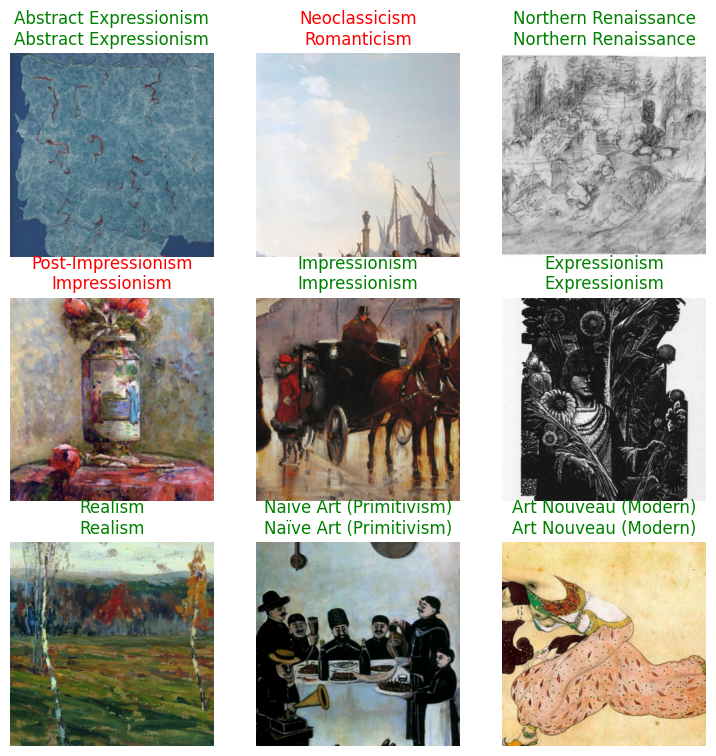

In [13]:
learner.show_results()

In [2]:
learner.validate() #last value is error rate (0.411)

NameError: name 'learner' is not defined

In [15]:
learner.export("painting_class.plk")

In [3]:
model = load_learner('./data/train/painting_class.plk')

NotImplementedError: cannot instantiate 'WindowsPath' on your system

In [30]:
df = pd.read_csv('all_data_info.csv')
df = df[df['in_train'] == False]
i = 100

path = './data/test/24.jpg'

model.predict(item = path )[0] #gets model name prediction


'Post-Impressionism'

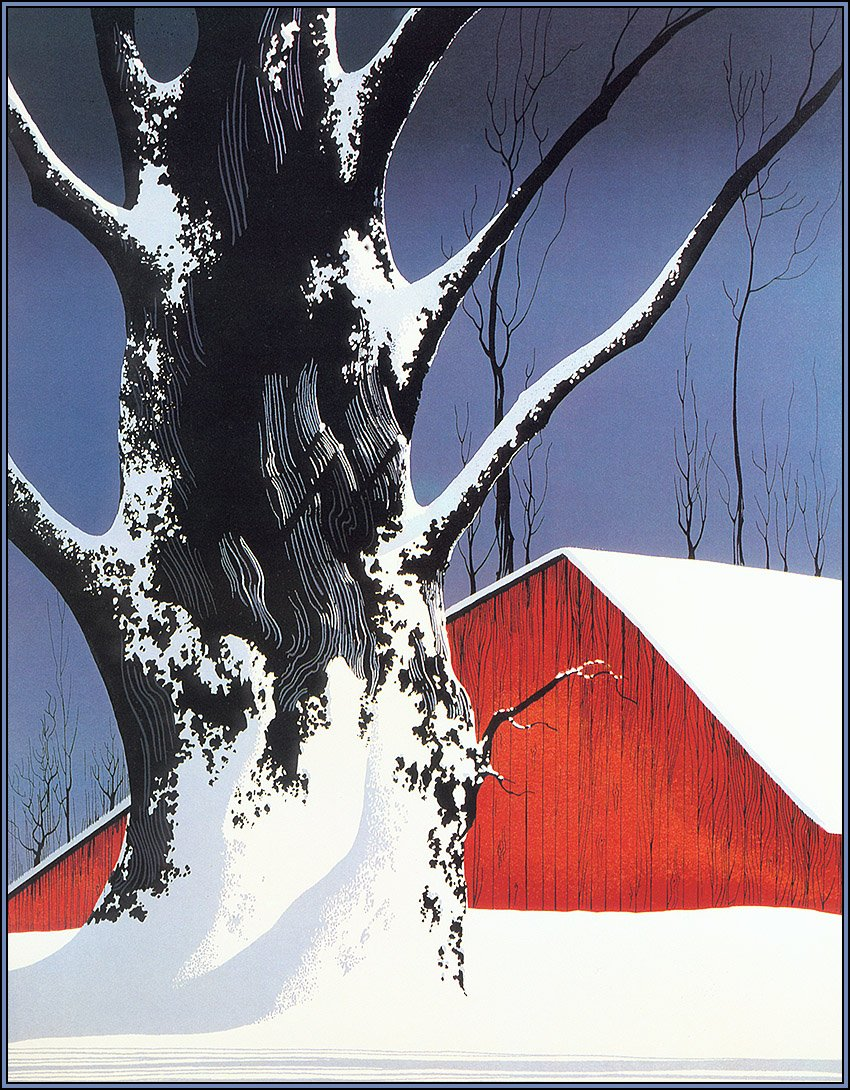

58167    Post-Impressionism
Name: style, dtype: object


In [74]:
from IPython.display import Image, display
display(Image(filename=path))

print(df[df['new_filename'].str.match('24.jpg')]['style'])


Le modèle a été bien enrengistré, ne nous reste plus qu'a définir la classification manuelle entre IA et SLIC pour la modélisation 3D

In [41]:
print(cat.index)

print("\nOn a au total " + str(cat.index.size) + " catégorie a decouper en 2 sous groupes, réaliste et non-réaliste")

Index(['Impressionism', 'Realism', 'Romanticism', 'Expressionism',
       'Post-Impressionism', 'Art Nouveau (Modern)', 'Baroque', 'Surrealism',
       'Symbolism', 'Rococo', 'Northern Renaissance',
       'Naïve Art (Primitivism)', 'Neoclassicism', 'Abstract Expressionism',
       'Cubism', 'Ukiyo-e', 'Early Renaissance', 'High Renaissance',
       'Mannerism (Late Renaissance)', 'Art Informel', 'Magic Realism'],
      dtype='object', name='style')

On a au total 21 catégorie a decouper en 2 sous groupe, réaliste et non-réaliste


In [71]:
#for cate in cat.index :
    # Affiche aléatoirement des peintures d'une catégorie selectionné

    #res = df[df['style'] == cate].sample()['new_filename'] #select a random row
    #print(res.values[0])
    #path = 'data/test/' + res.values[0]
    #display(Image(filename=path))
    #print(cate)
    



Realiste = [

"Realism",
"Romanticism",
"Baroque",
"Rococo",
"Neoclassicism",
"Early Renaissance",
"High Renaissance",
"Mannerism (Late Renaissance)"]

dict = {k: 1 for k in Realiste}

Abstrait = [

"Impressionism",
"Expressionism",
"Post-Impressionism",
"Art Nouveau (Modern)",
"Surrealism",
"Symbolism",
"Northern Renaissance",
"Naïve Art (Primitivism)",
"Abstract Expressionism",
"Ukiyo-e",
"Cubism",
"Art Informel",
"Magic Realism"]

dict2 = {k: 0 for k in Realiste}

dict.update(dict2)

print(dict)



{'Realism': 0, 'Romanticism': 0, 'Baroque': 0, 'Rococo': 0, 'Neoclassicism': 0, 'Early Renaissance': 0, 'High Renaissance': 0, 'Mannerism (Late Renaissance)': 0}


On a fini !!!!!!!

Plus qu'a utiliser le modèle et notre dictionnaire 